Desactivamos algunos warnings producto de librerías deprecadas

In [2]:
import warnings

from typing import List

warnings.filterwarnings("ignore")

In [3]:
# Dejar el path principal como el anterior.
import sys
sys.path.append('../')

Seteamos las configuraciones del Logging

In [4]:
import logging

# Crear el logger
log = logging.getLogger(__name__)

# Setear el nivel del registro
log.setLevel(logging.DEBUG)

# Formato de los mensajes
formatter = logging.Formatter("%(levelname)s: (%(asctime)s) [%(filename)s: %(lineno)s] %(message)s")

if not log.hasHandlers():
    # Handlers
    file_handler = logging.FileHandler("logging.log")
    file_handler.setFormatter(formatter)  # Setear el formato del handler
    # Agregar el handler al logger
    # log.addHandler(file_handler)

    stream_handler = logging.StreamHandler()
    stream_handler.setFormatter(formatter)
    # Agregar el handler al logger
    log.addHandler(stream_handler)

Instalar la librería plot-likert y otras librerías útiles

In [5]:
# Librería para hacer gráficos Likert
# !pip install plot-likert

# Para obtener datos de excel
# !pip install openpyxl

# Para tener un transformador de data
# !pip install -U scikit-learn

# Para tener herramientas estadísticas
# !python -m pip install statsmodels

# Para tener Seaborn
# !pip install seaborn

Empezamos importando la librería para verificar que estuvo bien instalada.

In [6]:
import plot_likert

Importamos algunas librerías útiles para el resto del notebook

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

Escogemos una paleta de colores apropiada para los gráficos Likert.

In [8]:
sns.set_palette("coolwarm", n_colors=10)
pal = sns.color_palette()
pal

[(0.3383765114431373, 0.45281860883137254, 0.8793170768784313),
 (0.4570464785254902, 0.5940055499294118, 0.963029229690196),
 (0.5814861481882353, 0.7134505955294117, 0.9983143529411764),
 (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 (0.8180564934117647, 0.8555896775450981, 0.9146376165490196),
 (0.9094595977529412, 0.8393864797647058, 0.8003313524235294),
 (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 (0.963806056435294, 0.6341884145294118, 0.5137208491529413),
 (0.9182816725843137, 0.48417347218039214, 0.37779392507058823),
 (0.8301865219490197, 0.30473276355294115, 0.25489142806666665)]

Hagamos un pequeño experimento con la librería Likert.

In [9]:
rng = np.random.default_rng(seed=42)
data = pd.DataFrame(rng.choice(plot_likert.scales.agree, (10,2)), columns=['Q1','Q2'])

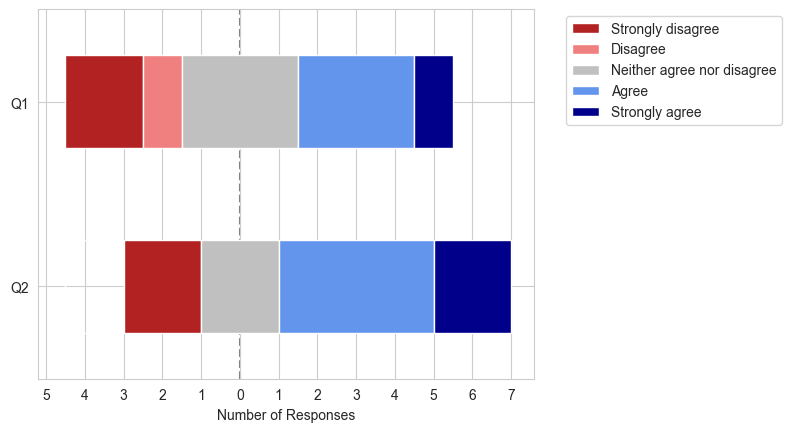

In [10]:
plot_likert.plot_likert(
    data, plot_likert.scales.agree,
    colors=plot_likert.colors.default_with_darker_neutral
);

El gráfico se ve bastante bien, para datos pequeños. Ahora intentemos importar la data de las respuestas.

Empezamos por buscar el path de los datos

In [11]:
DATA_PATH = Path(r"..\data")

if not DATA_PATH.exists():
    log.info(f"Creando carpeta {DATA_PATH = }")
    DATA_PATH.mkdir()

In [12]:
# Path absoluto
QNA_PATH = DATA_PATH / "questions-and-answers.xlsx"

In [13]:
log.debug(f"Importando datos de {QNA_PATH}")
df = pd.read_excel(QNA_PATH)
log.debug(f"Reemplazando typo")
df.replace("Ocacionalmente", "Ocasionalmente", inplace=True)
df.head()

DEBUG: (2022-12-26 20:11:51,294) [2253599479.py: 1] Importando datos de ..\data\questions-and-answers.xlsx
DEBUG: (2022-12-26 20:11:52,363) [2253599479.py: 3] Reemplazando typo


,Nota,¿Los profesores de ciencias consideran los intereses de los alumnos para elaborar y organizar las evaluaciones?,De las actividades realizadas en clase ¿el profesor considera y respeta nuestros intereses?,¿El profesor retroalimenta y refuerza en todas las clases lo que hemos ido aprendiendo?,El profesor de la clase de ciencias ¿anota y explica el objetivo que se va a trabajar durante la clase?,"El profesor, al cierre de su clase ¿realiza preguntas para verificar si hemos aprendido?",Cuando el profesor da tareas ¿las explica claramente y nos da ejemplos que orientan para realizarlas?,Durante la actividad ¿el profesor circula explicando y resolviendo dudas?,"¿Se realizan salidas a terreno: museos, zoológicos y otros lugares que ayudan al aprendizaje?","Para hacer las clases, el profesor ¿nos lleva a otros espacios motivantes para que aprendamos mejor?",...,"Cuando me queda alguna duda de la clase, ¿me dirijo confiadamente al profesor a preguntar?","Cuando el profesor es cercano conmigo y mis compañeros, ¿nos da confianza y seguridad para preguntar todas las dudas?",Cuando tengo más cercanía y confianza con el profesor ¿aprendo mejor?,"¿Los profesores de ciencias ofrecen diversas actividades grupales de un mismo tema, para que los estudiantes, elijan en la que quieren trabajar?",¿Los profesores de ciencias integran a todos los estudiantes para que participen en las actividades grupales dentro de la sala de clases?,"¿Los profesores de ciencias integran a todos los estudiantes en grupos, para que participen en las actividades de investigación, fuera del colegio?","¿Los profesores, muestran interés por reforzar a los alumnos que más les cuesta?","Cuando el profesor nos hace realizar actividades variadas, en ciencias ¿comprendo mejor la materia?",¿Los profesores de ciencias integran a todos los estudiantes para que participen en las actividades prácticas de laboratorio?,"En las clases de ciencias, ¿algunos alumnos son evaluados con carpetas de actividades realizadas en el colegio y fuera de él?"
0,3.4,"Siempre, en todas las clases","Siempre, en todas las clases",Ocasionalmente,"Siempre, en todas las clases","Siempre, en todas las clases",Nunca,"Siempre, en todas las clases",Nunca,Rara vez,...,Rara vez,Casi siempre,"Siempre, en todas las clases",Nunca,Ocasionalmente,Rara vez,Rara vez,Casi siempre,Casi siempre,Ocasionalmente
1,5.6,Nunca,Casi siempre,Casi siempre,"Siempre, en todas las clases",Ocasionalmente,Ocasionalmente,"Siempre, en todas las clases",Nunca,Nunca,...,"Siempre, en todas las clases",Casi siempre,Rara vez,Nunca,"Siempre, en todas las clases",Nunca,Rara vez,Rara vez,Nunca,"Siempre, en todas las clases"
2,3.4,Ocasionalmente,Casi siempre,Casi siempre,Casi siempre,Rara vez,Ocasionalmente,Casi siempre,Nunca,Rara vez,...,Casi siempre,"Siempre, en todas las clases",Casi siempre,Rara vez,Casi siempre,Nunca,Casi siempre,Casi siempre,Nunca,Rara vez
3,2.5,Rara vez,Ocasionalmente,Casi siempre,"Siempre, en todas las clases",Casi siempre,Ocasionalmente,"Siempre, en todas las clases",Rara vez,Rara vez,...,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Ocasionalmente,Casi siempre,Ocasionalmente,Casi siempre,Rara vez
4,7.0,Ocasionalmente,Casi siempre,Ocasionalmente,"Siempre, en todas las clases",Casi siempre,Casi siempre,Casi siempre,Nunca,Rara vez,...,Rara vez,Casi siempre,Ocasionalmente,Nunca,Casi siempre,Nunca,Rara vez,Ocasionalmente,Nunca,Ocasionalmente


Pongámosle las marcas de las preguntas a cada una de las preguntas (que queden con el formato "PXX: <Pregunta>")

In [14]:
columns = list(df.columns)
questions = columns[1:]
questions

['¿Los profesores de ciencias consideran los intereses de los alumnos para elaborar y organizar las evaluaciones?',
 'De las actividades realizadas en clase ¿el profesor considera y respeta nuestros intereses?',
 '¿El profesor retroalimenta y refuerza en todas las clases lo que hemos ido aprendiendo?',
 'El profesor de la clase de ciencias ¿anota y explica el objetivo que se va a trabajar durante la clase?',
 'El profesor, al cierre de su clase ¿realiza preguntas para verificar si hemos aprendido?',
 'Cuando el profesor da tareas ¿las explica claramente y nos da ejemplos que orientan para realizarlas?',
 'Durante la actividad ¿el profesor circula explicando y resolviendo dudas?',
 '¿Se realizan salidas a terreno: museos, zoológicos y otros lugares que ayudan al aprendizaje?',
 'Para hacer las clases, el profesor ¿nos lleva a otros espacios motivantes para que aprendamos mejor?',
 'El profesor de ciencias ¿presenta en sus clases material atractivo para aprender?',
 '¿Los profesores comp

In [15]:
import copy


log.debug("Renombrando columnas")
questions_copy = copy.copy(questions)
for i in range(len(questions)):
    questions_copy[i] = f"P{i+1}.: " + questions[i]

df.columns = [columns[0]] + questions_copy

df.head()

DEBUG: (2022-12-26 20:11:52,464) [2967887083.py: 4] Renombrando columnas


,Nota,P1.: ¿Los profesores de ciencias consideran los intereses de los alumnos para elaborar y organizar las evaluaciones?,P2.: De las actividades realizadas en clase ¿el profesor considera y respeta nuestros intereses?,P3.: ¿El profesor retroalimenta y refuerza en todas las clases lo que hemos ido aprendiendo?,P4.: El profesor de la clase de ciencias ¿anota y explica el objetivo que se va a trabajar durante la clase?,"P5.: El profesor, al cierre de su clase ¿realiza preguntas para verificar si hemos aprendido?",P6.: Cuando el profesor da tareas ¿las explica claramente y nos da ejemplos que orientan para realizarlas?,P7.: Durante la actividad ¿el profesor circula explicando y resolviendo dudas?,"P8.: ¿Se realizan salidas a terreno: museos, zoológicos y otros lugares que ayudan al aprendizaje?","P9.: Para hacer las clases, el profesor ¿nos lleva a otros espacios motivantes para que aprendamos mejor?",...,"P22.: Cuando me queda alguna duda de la clase, ¿me dirijo confiadamente al profesor a preguntar?","P23.: Cuando el profesor es cercano conmigo y mis compañeros, ¿nos da confianza y seguridad para preguntar todas las dudas?",P24.: Cuando tengo más cercanía y confianza con el profesor ¿aprendo mejor?,"P25.: ¿Los profesores de ciencias ofrecen diversas actividades grupales de un mismo tema, para que los estudiantes, elijan en la que quieren trabajar?",P26.: ¿Los profesores de ciencias integran a todos los estudiantes para que participen en las actividades grupales dentro de la sala de clases?,"P27.: ¿Los profesores de ciencias integran a todos los estudiantes en grupos, para que participen en las actividades de investigación, fuera del colegio?","P28.: ¿Los profesores, muestran interés por reforzar a los alumnos que más les cuesta?","P29.: Cuando el profesor nos hace realizar actividades variadas, en ciencias ¿comprendo mejor la materia?",P30.: ¿Los profesores de ciencias integran a todos los estudiantes para que participen en las actividades prácticas de laboratorio?,"P31.: En las clases de ciencias, ¿algunos alumnos son evaluados con carpetas de actividades realizadas en el colegio y fuera de él?"
0,3.4,"Siempre, en todas las clases","Siempre, en todas las clases",Ocasionalmente,"Siempre, en todas las clases","Siempre, en todas las clases",Nunca,"Siempre, en todas las clases",Nunca,Rara vez,...,Rara vez,Casi siempre,"Siempre, en todas las clases",Nunca,Ocasionalmente,Rara vez,Rara vez,Casi siempre,Casi siempre,Ocasionalmente
1,5.6,Nunca,Casi siempre,Casi siempre,"Siempre, en todas las clases",Ocasionalmente,Ocasionalmente,"Siempre, en todas las clases",Nunca,Nunca,...,"Siempre, en todas las clases",Casi siempre,Rara vez,Nunca,"Siempre, en todas las clases",Nunca,Rara vez,Rara vez,Nunca,"Siempre, en todas las clases"
2,3.4,Ocasionalmente,Casi siempre,Casi siempre,Casi siempre,Rara vez,Ocasionalmente,Casi siempre,Nunca,Rara vez,...,Casi siempre,"Siempre, en todas las clases",Casi siempre,Rara vez,Casi siempre,Nunca,Casi siempre,Casi siempre,Nunca,Rara vez
3,2.5,Rara vez,Ocasionalmente,Casi siempre,"Siempre, en todas las clases",Casi siempre,Ocasionalmente,"Siempre, en todas las clases",Rara vez,Rara vez,...,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Ocasionalmente,Casi siempre,Ocasionalmente,Casi siempre,Rara vez
4,7.0,Ocasionalmente,Casi siempre,Ocasionalmente,"Siempre, en todas las clases",Casi siempre,Casi siempre,Casi siempre,Nunca,Rara vez,...,Rara vez,Casi siempre,Ocasionalmente,Nunca,Casi siempre,Nunca,Rara vez,Ocasionalmente,Nunca,Ocasionalmente


In [18]:
columns

['P1.: ¿Los profesores de ciencias consideran los intereses de los alumnos para elaborar y organizar las evaluaciones?',
 'P2.: De las actividades realizadas en clase ¿el profesor considera y respeta nuestros intereses?',
 'P3.: ¿El profesor retroalimenta y refuerza en todas las clases lo que hemos ido aprendiendo?',
 'P4.: El profesor de la clase de ciencias ¿anota y explica el objetivo que se va a trabajar durante la clase?',
 'P5.: El profesor, al cierre de su clase ¿realiza preguntas para verificar si hemos aprendido?',
 'P6.: Cuando el profesor da tareas ¿las explica claramente y nos da ejemplos que orientan para realizarlas?',
 'P7.: Durante la actividad ¿el profesor circula explicando y resolviendo dudas?',
 'P8.: ¿Se realizan salidas a terreno: museos, zoológicos y otros lugares que ayudan al aprendizaje?',
 'P9.: Para hacer las clases, el profesor ¿nos lleva a otros espacios motivantes para que aprendamos mejor?',
 'P10.: El profesor de ciencias ¿presenta en sus clases materia

In [17]:
columns = list(df.columns)
columns.pop(0)

'Nota'

In [25]:
df1 = df[columns[:6]]
df1.head()

,P1.: ¿Los profesores de ciencias consideran los intereses de los alumnos para elaborar y organizar las evaluaciones?,P2.: De las actividades realizadas en clase ¿el profesor considera y respeta nuestros intereses?,P3.: ¿El profesor retroalimenta y refuerza en todas las clases lo que hemos ido aprendiendo?,P4.: El profesor de la clase de ciencias ¿anota y explica el objetivo que se va a trabajar durante la clase?,"P5.: El profesor, al cierre de su clase ¿realiza preguntas para verificar si hemos aprendido?",P6.: Cuando el profesor da tareas ¿las explica claramente y nos da ejemplos que orientan para realizarlas?
0,"Siempre, en todas las clases","Siempre, en todas las clases",Ocasionalmente,"Siempre, en todas las clases","Siempre, en todas las clases",Nunca
1,Nunca,Casi siempre,Casi siempre,"Siempre, en todas las clases",Ocasionalmente,Ocasionalmente
2,Ocasionalmente,Casi siempre,Casi siempre,Casi siempre,Rara vez,Ocasionalmente
3,Rara vez,Ocasionalmente,Casi siempre,"Siempre, en todas las clases",Casi siempre,Ocasionalmente
4,Ocasionalmente,Casi siempre,Ocasionalmente,"Siempre, en todas las clases",Casi siempre,Casi siempre


In [26]:
scales = [
    "Nunca",
    "Rara vez",
    "Ocasionalmente",
    "Casi siempre",
    "Siempre, en todas las clases"
]

In [27]:
colors = list(sns.color_palette().as_hex())
n_colors = len(colors)

In [28]:
likert_colors: plot_likert.colors.Colors = [
    plot_likert.colors.TRANSPARENT,
    colors[-1],
    colors[-2],
    "silver",
    colors[1],
    colors[0],
]

INFO: (2022-12-13 21:14:27,780) [1598947936.py: 8] personalised_plot_likert: (title=None, xlabel='Porcentaje de respuestas')
DEBUG: (2022-12-13 21:14:27,782) [1598947936.py: 12] kwargs={'bar_labels': True, 'colors': ['#ffffff00', '#d44e41', '#ea7b60', 'silver', '#7597f6', '#5673e0'], 'plot_percentage': True}
DEBUG: (2022-12-13 21:14:27,786) [1598947936.py: 18] Creando plot con plot_likert


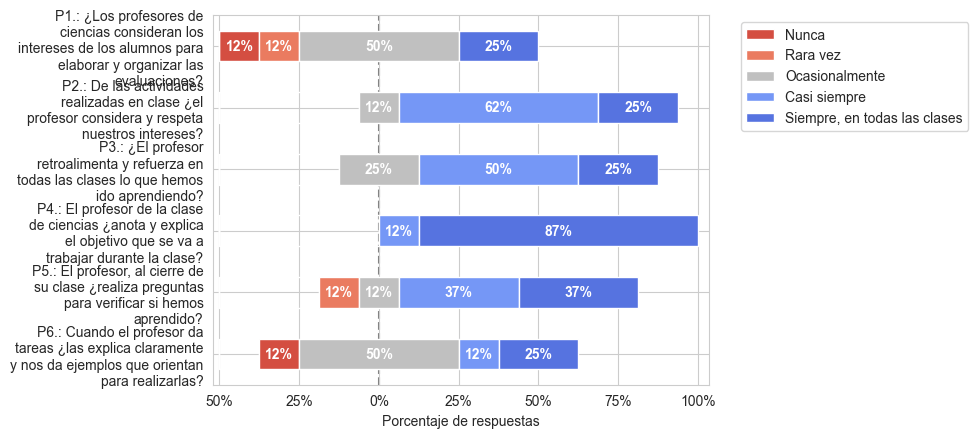

In [29]:
def personalised_plot_likert(
        df, questions: List[str],
        scales=tuple(scales),
        title=None, xlabel='Porcentaje de respuestas',
        save_path=None, save_config=None,
        **kwargs
):
    log.info(f"personalised_plot_likert: ({title=}, {xlabel=})")
    kwargs.setdefault("bar_labels", True)
    kwargs.setdefault("colors", likert_colors.copy())
    kwargs.setdefault("plot_percentage", True)
    log.debug(f"{kwargs=}")

    # Filtrando data frame
    new_df = df[questions]

    # Creando el gráfico
    log.debug("Creando plot con plot_likert")
    ax = plot_likert.plot_likert(new_df, scales, **kwargs)
    ax.xaxis.set_label_text(xlabel)
    ax.set_title(title)

    if save_path:
        log.info(f"Salvando figura en {save_path=}")
        save_config = save_config or dict()
        save_config.setdefault("dpi", 600)
        save_config.setdefault("bbox_inches", "tight")
        log.debug(f"{save_config=}")
        ax.get_figure().savefig(save_path, **save_config)
    return ax

personalised_plot_likert(df, questions=columns[:6])
plt.show()

In [30]:
# Crear la carpeta de imágenes, si no se ha creado
from pathlib import Path


IMG_PATH = Path(r"..\img")

if not IMG_PATH.exists():
    log.info(f"Creando path {IMG_PATH = }")
    IMG_PATH.mkdir()

In [31]:
# Crear la carpeta de sub-dimensiones, si no se ha creado
IMG_SUB_DIMS_PATH = IMG_PATH / "sub-dims"

if not IMG_SUB_DIMS_PATH.exists():
    log.info(f"Creando path {IMG_SUB_DIMS_PATH = }")
    IMG_SUB_DIMS_PATH.mkdir()

INFO: (2022-12-13 21:16:49,272) [1598947936.py: 8] personalised_plot_likert: (title='Sub-dimensión 1.1: Preparación de la clase', xlabel='Porcentaje de respuestas')
DEBUG: (2022-12-13 21:16:49,275) [1598947936.py: 12] kwargs={'figsize': (6.4, 8), 'bar_labels': True, 'colors': ['#ffffff00', '#d44e41', '#ea7b60', 'silver', '#7597f6', '#5673e0'], 'plot_percentage': True}
DEBUG: (2022-12-13 21:16:49,279) [1598947936.py: 18] Creando plot con plot_likert
INFO: (2022-12-13 21:16:49,742) [1598947936.py: 24] Salvando figura en save_path=WindowsPath('../img/sub-dims/sub-dim-1.1-preparacion-de-la-clase.png')
DEBUG: (2022-12-13 21:16:49,747) [1598947936.py: 28] save_config={'dpi': 600, 'bbox_inches': 'tight'}


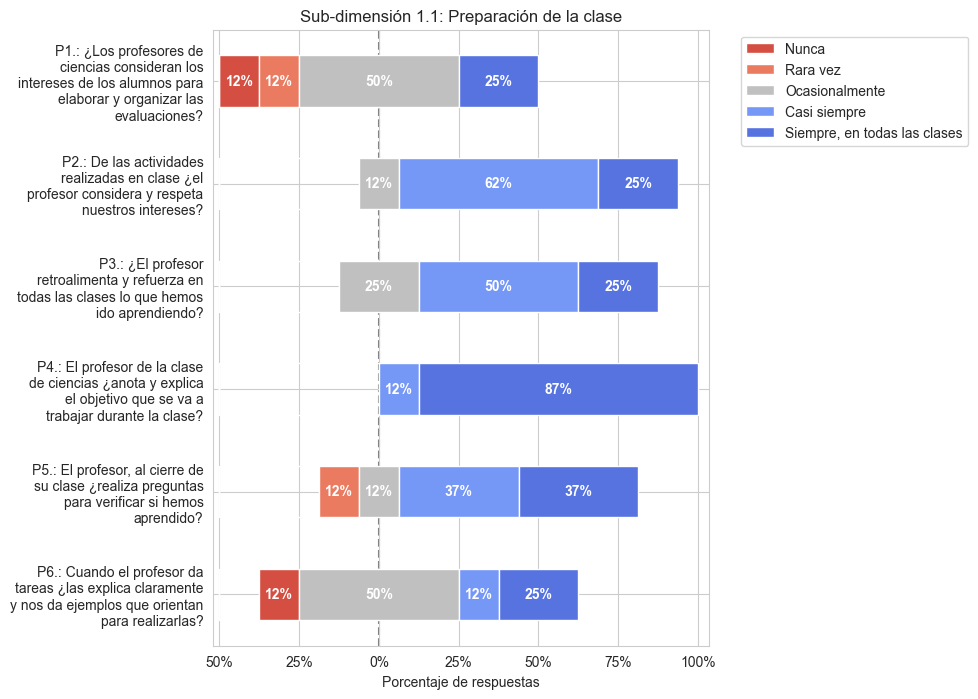

In [32]:
personalised_plot_likert(
    df,
    questions=columns[:6],
    figsize=(6.4, 8),
    title="Sub-dimensión 1.1: Preparación de la clase",
    save_path=IMG_SUB_DIMS_PATH / "sub-dim-1.1-preparacion-de-la-clase.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=columns[6:10],
    figsize=(6.4, 6),
    title="Sub-dimensión 1.2: Metodologías activas",
    save_path=IMG_SUB_DIMS_PATH / "sub-dim-1.2-metodologias-activas.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=columns[10:16],
    figsize=(6.4, 9),
    title="Sub-dimensión 1.3: Evaluación de y para los aprendizajes",
    save_path=IMG_SUB_DIMS_PATH / "sub-dim-1.3-evaluacion-de-y-para-los-aprendizajes.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=columns[16:18],
    title="Sub-dimensión 2.1: Aprendizaje mediado con tecnologías",
    save_path=IMG_SUB_DIMS_PATH / "sub-dim-2.1-aprendizaje-mediado-con-tecnologías.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=columns[18:20],
    title="Sub-dimensión 2.2: Aprendizaje Directo",
    save_path=IMG_SUB_DIMS_PATH / "sub-dim-2.2-aprendizaje-directo.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=columns[20:24],
    figsize=(6.4, 6),
    title="Sub-dimensión 2.3: Comunicación Pedagógica",
    save_path=IMG_SUB_DIMS_PATH / "sub-dim-2.3-comunicacion-pedagogica.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=columns[24:31],
    figsize=(6.4, 11),
    title="Sub-dimensión 2.4: Interacciones en el Trabajo Colaborativo Inclusivo",
    save_path=IMG_SUB_DIMS_PATH / "sub-dim-2.4-interacciones-en-el-trabajo-cColaborativo-inclusivo.png",
)
plt.show()

Hacemos una función para los gráficos de pastel.

In [34]:
def parse_question(question):
    """
    Dada una pregunta, le quita caracteres especiales, y los deja en formato con letras minusculas, y con un guion de separacion
    :param question:
    :return:
    """
    question = question.casefold()
    question = filter(lambda x: x.isalpha() or x.isnumeric() or x.isspace(), question)
    question = "".join(question).replace(" ", "-")
    return question

parse_question(questions_copy[0]), questions_copy[0]

('p1-los-profesores-de-ciencias-consideran-los-intereses-de-los-alumnos-para-elaborar-y-organizar-las-evaluaciones',
 'P1.: ¿Los profesores de ciencias consideran los intereses de los alumnos para elaborar y organizar las evaluaciones?')

In [35]:
IMG_QUESTIONS_PATH = IMG_PATH / "questions"

if not IMG_QUESTIONS_PATH.exists():
    log.info(f"Creando path {IMG_QUESTIONS_PATH = }")
    IMG_QUESTIONS_PATH.mkdir()

INFO: (2022-12-13 21:22:28,046) [3636860979.py: 4] Creando path IMG_QUESTIONS_PATH = WindowsPath('../img/questions1')


In [36]:
df

,Nota,P1.: ¿Los profesores de ciencias consideran los intereses de los alumnos para elaborar y organizar las evaluaciones?,P2.: De las actividades realizadas en clase ¿el profesor considera y respeta nuestros intereses?,P3.: ¿El profesor retroalimenta y refuerza en todas las clases lo que hemos ido aprendiendo?,P4.: El profesor de la clase de ciencias ¿anota y explica el objetivo que se va a trabajar durante la clase?,"P5.: El profesor, al cierre de su clase ¿realiza preguntas para verificar si hemos aprendido?",P6.: Cuando el profesor da tareas ¿las explica claramente y nos da ejemplos que orientan para realizarlas?,P7.: Durante la actividad ¿el profesor circula explicando y resolviendo dudas?,"P8.: ¿Se realizan salidas a terreno: museos, zoológicos y otros lugares que ayudan al aprendizaje?","P9.: Para hacer las clases, el profesor ¿nos lleva a otros espacios motivantes para que aprendamos mejor?",...,"P22.: Cuando me queda alguna duda de la clase, ¿me dirijo confiadamente al profesor a preguntar?","P23.: Cuando el profesor es cercano conmigo y mis compañeros, ¿nos da confianza y seguridad para preguntar todas las dudas?",P24.: Cuando tengo más cercanía y confianza con el profesor ¿aprendo mejor?,"P25.: ¿Los profesores de ciencias ofrecen diversas actividades grupales de un mismo tema, para que los estudiantes, elijan en la que quieren trabajar?",P26.: ¿Los profesores de ciencias integran a todos los estudiantes para que participen en las actividades grupales dentro de la sala de clases?,"P27.: ¿Los profesores de ciencias integran a todos los estudiantes en grupos, para que participen en las actividades de investigación, fuera del colegio?","P28.: ¿Los profesores, muestran interés por reforzar a los alumnos que más les cuesta?","P29.: Cuando el profesor nos hace realizar actividades variadas, en ciencias ¿comprendo mejor la materia?",P30.: ¿Los profesores de ciencias integran a todos los estudiantes para que participen en las actividades prácticas de laboratorio?,"P31.: En las clases de ciencias, ¿algunos alumnos son evaluados con carpetas de actividades realizadas en el colegio y fuera de él?"
0,3.4,"Siempre, en todas las clases","Siempre, en todas las clases",Ocasionalmente,"Siempre, en todas las clases","Siempre, en todas las clases",Nunca,"Siempre, en todas las clases",Nunca,Rara vez,...,Rara vez,Casi siempre,"Siempre, en todas las clases",Nunca,Ocasionalmente,Rara vez,Rara vez,Casi siempre,Casi siempre,Ocasionalmente
1,5.6,Nunca,Casi siempre,Casi siempre,"Siempre, en todas las clases",Ocasionalmente,Ocasionalmente,"Siempre, en todas las clases",Nunca,Nunca,...,"Siempre, en todas las clases",Casi siempre,Rara vez,Nunca,"Siempre, en todas las clases",Nunca,Rara vez,Rara vez,Nunca,"Siempre, en todas las clases"
2,3.4,Ocasionalmente,Casi siempre,Casi siempre,Casi siempre,Rara vez,Ocasionalmente,Casi siempre,Nunca,Rara vez,...,Casi siempre,"Siempre, en todas las clases",Casi siempre,Rara vez,Casi siempre,Nunca,Casi siempre,Casi siempre,Nunca,Rara vez
3,2.5,Rara vez,Ocasionalmente,Casi siempre,"Siempre, en todas las clases",Casi siempre,Ocasionalmente,"Siempre, en todas las clases",Rara vez,Rara vez,...,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Casi siempre,Ocasionalmente,Casi siempre,Ocasionalmente,Casi siempre,Rara vez
4,7.0,Ocasionalmente,Casi siempre,Ocasionalmente,"Siempre, en todas las clases",Casi siempre,Casi siempre,Casi siempre,Nunca,Rara vez,...,Rara vez,Casi siempre,Ocasionalmente,Nunca,Casi siempre,Nunca,Rara vez,Ocasionalmente,Nunca,Ocasionalmente
5,1.0,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Rara vez,Nunca,...,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Nunca,"Siempre, en todas las clases","Siempre, en todas las clases

INFO: (2022-12-13 21:27:26,345) [3279352385.py: 14] pie_plot(question='P1.: ¿Los profesores de ciencias consideran los intereses de los alumnos para elaborar y organizar las evaluaciones?', scales=('Nunca', 'Rara vez', 'Ocasionalmente', 'Casi siempre', 'Siempre, en todas las clases'), kwargs_pie={'startangle': 90}, legend_loc=(1.2, 0.7), width_wrap=70)
DEBUG: (2022-12-13 21:27:26,347) [3279352385.py: 22] Contando el número de respuestas por escala
DEBUG: (2022-12-13 21:27:26,349) [3279352385.py: 27] count_scales = odict_values([1, 1, 4, 0, 2])
DEBUG: (2022-12-13 21:27:26,351) [3279352385.py: 32] x = array([0.125, 0.125, 0.5  , 0.25 ])
DEBUG: (2022-12-13 21:27:26,353) [3279352385.py: 34] labels = ['Nunca', 'Rara vez', 'Ocasionalmente', 'Siempre, en todas las clases']
DEBUG: (2022-12-13 21:27:26,354) [3279352385.py: 36] colors = ['#d44e41', '#ea7b60', 'silver', '#5673e0']
DEBUG: (2022-12-13 21:27:26,356) [3279352385.py: 46] kwargs_pie = {'startangle': 90, 'x': array([0.125, 0.125, 0.5  ,

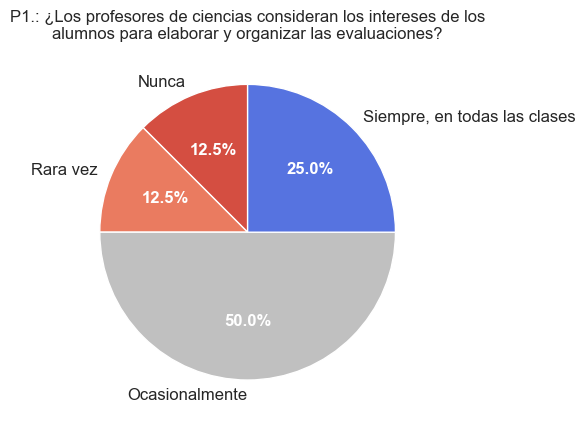

In [39]:
def pie_plot(
        df,
        question,
        scales=tuple(scales),
        kwargs_pie: dict = None,
        add_legend=False,
        legend_loc=(1.2, 0.7),
        width_wrap=70,
        save=False,
        save_path: str = None,
        save_config=None,
        threshold_percentage=0.05,
):
    log.info(f"pie_plot({question=}, {scales=}, {kwargs_pie=}, {legend_loc=}, {width_wrap=})")
    from collections import OrderedDict
    from textwrap import wrap

    # Respuestas de todos los alumnos dada una pregunta
    list_answers = df[question]

    # Empezaremos a contar el número de respuestas dada la escala de Likert
    log.debug("Contando el número de respuestas por escala")
    count_scales = OrderedDict((scale, 0) for scale in scales)
    for answer in list_answers:
        count_scales[answer] += 1
    count_scales = count_scales.values()
    log.debug(f"{count_scales = }")

    # Filtramos los valores que son iguales a cero
    x = np.array([count for count in count_scales if count > 0])
    x = x / sum(x)  # Sacar el porcentaje (entre 0 y 1)
    log.debug(f"{x = }")
    labels: List[str] = [scale for count, scale in zip(count_scales, scales) if count > 0]
    log.debug(f"{labels = }")
    colors: List[str] = [color for count, color in zip(count_scales, likert_colors[1:]) if count > 0]
    log.debug(f"{colors = }")

    # Seteamos un diccionario para los argumentos del gráfico de pastel, y seteamos valores por default
    kwargs_pie = kwargs_pie or dict()
    kwargs_pie.setdefault("x", x)
    kwargs_pie.setdefault("labels", labels)
    kwargs_pie.setdefault("colors", colors)
    kwargs_pie.setdefault("autopct", '%1.1f%%')
    kwargs_pie.setdefault("textprops", dict(size='large'))
    kwargs_pie.setdefault("startangle", 0)
    log.debug(f"{kwargs_pie = }")

    # Generamos el gráfico pastel
    log.debug("Generando el gráfico de pastel.")
    fig, ax = plt.subplots()
    patches, texts, autotexts = ax.pie(**kwargs_pie)

    # Cambiamos las letras de los porcentajes para que estén ennegrecidas y de color blanco
    log.debug("Cambiando las letras a color blanco.")
    for autotext, value in zip(autotexts, x):
        autotext.set(fontweight='bold', color='white')
        if value < threshold_percentage:
            autotext.set(text="")


    # Cambialos el lugar de la leyenda
    log.info("Agregando leyenda y título")
    if add_legend: plt.legend(loc=legend_loc)
    ax.set_title("\n".join(wrap(question, width_wrap)))

    if save:

        if not save_path:
            save_path = parse_question(question)
            save_path = IMG_QUESTIONS_PATH / (save_path + ".png")
            log.debug(f"{save_path = }")

        save_config = save_config or dict()
        save_config.setdefault("dpi", 600)
        save_config.setdefault("bbox_inches", "tight")
        log.debug(f"{save_config=}")

        log.info(f"Salvando figura en {save_path=}")
        ax.get_figure().savefig(save_path, **save_config)
        log.info(f"Figura salvada.")

    return patches, texts, autotexts

pie_plot(df, questions_copy[0], save=False, kwargs_pie=dict(startangle=0))

plt.show()

In [ ]:
for question in questions_copy:
    pie_plot(df, question, save=True)

Ahora tenemos que realizar lo mismo, pero con el dataset completo (el de 80 alumnos).

In [41]:
QNA_COMPLETE_PATH = DATA_PATH / "questions-and-answers-complete.xlsx"
QNA_COMPLETE_PATH

WindowsPath('../data/questions-and-answers-complete.xlsx')

In [42]:
log.debug(f"Importando datos de {QNA_COMPLETE_PATH}")
df = pd.read_excel(QNA_COMPLETE_PATH)

# Quitar el promedio
del df["Prom Cs"]
df.head()

DEBUG: (2022-12-13 21:32:08,518) [3281644635.py: 1] Importando datos de ..\data\questions-and-answers-complete.xlsx


,¿Los profesores de ciencias consideran los intereses de los alumnos para elaborar y organizar las evaluaciones?,De las actividades realizadas en clase ¿el profesor considera y respeta nuestros intereses?,¿El profesor retroalimenta y refuerza en todas las clases lo que hemos ido aprendiendo?,El profesor de la clase de ciencias ¿anota y explica el objetivo que se va a trabajar durante la clase?,"El profesor, al cierre de su clase ¿realiza preguntas para verificar si hemos aprendido?",Cuando el profesor da tareas ¿las explica claramente y nos da ejemplos que orientan para realizarlas?,Durante la actividad ¿el profesor circula explicando y resolviendo dudas?,"¿Se realizan salidas a terreno: museos, zoológicos y otros lugares que ayudan al aprendizaje?","Para hacer las clases, el profesor ¿nos lleva a otros espacios motivantes para que aprendamos mejor?",El profesor de ciencias ¿presenta en sus clases material atractivo para aprender?,...,"Cuando me queda alguna duda de la clase, ¿me dirijo confiadamente al profesor a preguntar?","Cuando el profesor es cercano conmigo y mis compañeros, ¿nos da confianza y seguridad para preguntar todas las dudas?",Cuando tengo más cercanía y confianza con el profesor ¿aprendo mejor?,"¿Los profesores de ciencias ofrecen diversas actividades grupales de un mismo tema, para que los estudiantes, elijan en la que quieren trabajar?",¿Los profesores de ciencias integran a todos los estudiantes para que participen en las actividades grupales dentro de la sala de clases?,"¿Los profesores de ciencias integran a todos los estudiantes en grupos, para que participen en las actividades de investigación, fuera del colegio?","¿Los profesores, muestran interés por reforzar a los alumnos que más les cuesta?","Cuando el profesor nos hace realizar actividades variadas, en ciencias ¿comprendo mejor la materia?",¿Los profesores de ciencias integran a todos los estudiantes para que participen en las actividades prácticas de laboratorio?,"En las clases de ciencias, ¿algunos alumnos son evaluados con carpetas de actividades realizadas en el colegio y fuera de él?"
0,Ocasionalmente,Casi siempre,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Casi siempre,"Siempre, en todas las clases",Nunca,Rara vez,Casi siempre,...,Casi siempre,"Siempre, en todas las clases","Siempre, en todas las clases",Casi siempre,Casi siempre,Rara vez,Casi siempre,"Siempre, en todas las clases","Siempre, en todas las clases",Nunca
1,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Casi siempre,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",...,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases"
2,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Ocasionalmente,"Siempre, en todas las clases","Siempre, en todas las clases",Nunca,Ocasionalmente,"Siempre, en todas las clases",...,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Nunca,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Ocasionalmente
3,Casi siempre,Casi siempre,Rara vez,Casi siempre,Casi siempre,Casi siempre,Ocasionalmente,Nunca,Ocasionalmente,Ocasionalmente,...,Nunca,Casi siempre,"Siempre, en todas las clases",Ocasionalmente,Casi siempre,"Siempre, en todas las clases",Rara vez,Ocasionalmente,Rara vez,Nunca
4,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las cl

In [43]:
questions = list(df.columns)
questions

['¿Los profesores de ciencias consideran los intereses de los alumnos para elaborar y organizar las evaluaciones?',
 'De las actividades realizadas en clase ¿el profesor considera y respeta nuestros intereses?',
 '¿El profesor retroalimenta y refuerza en todas las clases lo que hemos ido aprendiendo?',
 'El profesor de la clase de ciencias ¿anota y explica el objetivo que se va a trabajar durante la clase?',
 'El profesor, al cierre de su clase ¿realiza preguntas para verificar si hemos aprendido?',
 'Cuando el profesor da tareas ¿las explica claramente y nos da ejemplos que orientan para realizarlas?',
 'Durante la actividad ¿el profesor circula explicando y resolviendo dudas?',
 '¿Se realizan salidas a terreno: museos, zoológicos y otros lugares que ayudan al aprendizaje?',
 'Para hacer las clases, el profesor ¿nos lleva a otros espacios motivantes para que aprendamos mejor?',
 'El profesor de ciencias ¿presenta en sus clases material atractivo para aprender?',
 '¿Los profesores comp

In [44]:
import copy


log.debug("Renombrando columnas")
questions_copy = copy.copy(questions)
for i in range(len(questions)):
    questions_copy[i] = f"P{i+1}.: " + questions[i]

df.columns = questions = questions_copy


df.head()

DEBUG: (2022-12-13 21:32:20,029) [1393485990.py: 4] Renombrando columnas


,P1.: ¿Los profesores de ciencias consideran los intereses de los alumnos para elaborar y organizar las evaluaciones?,P2.: De las actividades realizadas en clase ¿el profesor considera y respeta nuestros intereses?,P3.: ¿El profesor retroalimenta y refuerza en todas las clases lo que hemos ido aprendiendo?,P4.: El profesor de la clase de ciencias ¿anota y explica el objetivo que se va a trabajar durante la clase?,"P5.: El profesor, al cierre de su clase ¿realiza preguntas para verificar si hemos aprendido?",P6.: Cuando el profesor da tareas ¿las explica claramente y nos da ejemplos que orientan para realizarlas?,P7.: Durante la actividad ¿el profesor circula explicando y resolviendo dudas?,"P8.: ¿Se realizan salidas a terreno: museos, zoológicos y otros lugares que ayudan al aprendizaje?","P9.: Para hacer las clases, el profesor ¿nos lleva a otros espacios motivantes para que aprendamos mejor?",P10.: El profesor de ciencias ¿presenta en sus clases material atractivo para aprender?,...,"P22.: Cuando me queda alguna duda de la clase, ¿me dirijo confiadamente al profesor a preguntar?","P23.: Cuando el profesor es cercano conmigo y mis compañeros, ¿nos da confianza y seguridad para preguntar todas las dudas?",P24.: Cuando tengo más cercanía y confianza con el profesor ¿aprendo mejor?,"P25.: ¿Los profesores de ciencias ofrecen diversas actividades grupales de un mismo tema, para que los estudiantes, elijan en la que quieren trabajar?",P26.: ¿Los profesores de ciencias integran a todos los estudiantes para que participen en las actividades grupales dentro de la sala de clases?,"P27.: ¿Los profesores de ciencias integran a todos los estudiantes en grupos, para que participen en las actividades de investigación, fuera del colegio?","P28.: ¿Los profesores, muestran interés por reforzar a los alumnos que más les cuesta?","P29.: Cuando el profesor nos hace realizar actividades variadas, en ciencias ¿comprendo mejor la materia?",P30.: ¿Los profesores de ciencias integran a todos los estudiantes para que participen en las actividades prácticas de laboratorio?,"P31.: En las clases de ciencias, ¿algunos alumnos son evaluados con carpetas de actividades realizadas en el colegio y fuera de él?"
0,Ocasionalmente,Casi siempre,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Casi siempre,"Siempre, en todas las clases",Nunca,Rara vez,Casi siempre,...,Casi siempre,"Siempre, en todas las clases","Siempre, en todas las clases",Casi siempre,Casi siempre,Rara vez,Casi siempre,"Siempre, en todas las clases","Siempre, en todas las clases",Nunca
1,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Casi siempre,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",...,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases"
2,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Ocasionalmente,"Siempre, en todas las clases","Siempre, en todas las clases",Nunca,Ocasionalmente,"Siempre, en todas las clases",...,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Nunca,"Siempre, en todas las clases","Siempre, en todas las clases","Siempre, en todas las clases",Ocasionalmente
3,Casi siempre,Casi siempre,Rara vez,Casi siempre,Casi siempre,Casi siempre,Ocasionalmente,Nunca,Ocasionalmente,Ocasionalmente,...,Nunca,Casi siempre,"Siempre, en todas las clases",Ocasionalmente,Casi siempre,"Siempre, en todas las clases",Rara vez,Ocasiona

In [45]:
IMG_SUB_DIMS_COMPLETE_PATH = IMG_PATH / "sub-dims-complete"

if not IMG_SUB_DIMS_COMPLETE_PATH.exists():
    log.info(f"Creando path {IMG_SUB_DIMS_COMPLETE_PATH = }")
    IMG_SUB_DIMS_COMPLETE_PATH.mkdir()

In [46]:
log.setLevel(logging.INFO)

In [ ]:
personalised_plot_likert(
    df,
    questions=questions[:6],
    figsize=(6.4, 8),
    title="Sub-dimensión 1.1: Preparación de la clase",
    save_path=IMG_SUB_DIMS_COMPLETE_PATH / "sub-dim-1.1-preparacion-de-la-clase.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=questions[6:10],
    figsize=(6.4, 6),
    title="Sub-dimensión 1.2: Metodologías activas",
    save_path=IMG_SUB_DIMS_COMPLETE_PATH / "sub-dim-1.2-metodologias-activas.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=questions[10:16],
    figsize=(6.4, 9),
    title="Sub-dimensión 1.3: Evaluación de y para los aprendizajes",
    save_path=IMG_SUB_DIMS_COMPLETE_PATH / "sub-dim-1.3-evaluacion-de-y-para-los-aprendizajes.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=questions[16:18],
    title="Sub-dimensión 2.1: Aprendizaje mediado con tecnologías",
    save_path=IMG_SUB_DIMS_COMPLETE_PATH / "sub-dim-2.1-aprendizaje-mediado-con-tecnologías.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=questions[18:20],
    title="Sub-dimensión 2.2: Aprendizaje Directo",
    save_path=IMG_SUB_DIMS_COMPLETE_PATH / "sub-dim-2.2-aprendizaje-directo.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=questions[20:24],
    figsize=(6.4, 6),
    title="Sub-dimensión 2.3: Comunicación Pedagógica",
    save_path=IMG_SUB_DIMS_COMPLETE_PATH / "sub-dim-2.3-comunicacion-pedagogica.png",
)
plt.show()

In [ ]:
personalised_plot_likert(
    df,
    questions=questions[24:31],
    figsize=(6.4, 11),
    title="Sub-dimensión 2.4: Interacciones en el Trabajo Colaborativo Inclusivo",
    save_path=IMG_SUB_DIMS_COMPLETE_PATH / "sub-dim-2.4-interacciones-en-el-trabajo-cColaborativo-inclusivo.png",
)
plt.show()

Hacemos lo mismo para los gráficos pastel

In [47]:
IMG_QUESTIONS_COMPLETE_PATH = IMG_PATH / "questions-complete"

if not IMG_QUESTIONS_COMPLETE_PATH.exists():
    log.info(f"Creando path {IMG_QUESTIONS_COMPLETE_PATH = }")
    IMG_QUESTIONS_COMPLETE_PATH.mkdir()

In [48]:
for question in questions:
    pie_plot(df, question, save=True, save_path=IMG_QUESTIONS_COMPLETE_PATH / (parse_question(question) + ".png"), kwargs_pie=dict(startangle=0), threshold_percentage=0.05)

INFO: (2022-12-13 21:32:34,449) [3279352385.py: 14] pie_plot(question='P', scales=('Nunca', 'Rara vez', 'Ocasionalmente', 'Casi siempre', 'Siempre, en todas las clases'), kwargs_pie={'startangle': 0}, legend_loc=(1.2, 0.7), width_wrap=70)


KeyError: 'P'

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

Para gráficos bonitos